In [1]:
#Google speech to text
#The original goal was to see if google text to speech would be good enough in detecting the words / phonemes of each speaker
#And seeing if non-native speakers would confuse a powerful neural net model such as google's speech to text
from google.cloud import speech_v1
from google.cloud.speech_v1 import enums
import io

SCOPE = ["https://www.googleapis.com/auth/cloud-platform"]
SECRETS_FILE = "D:\Repos\EE3EC\Systems-Design-F19\andrew\API_KEY.json"

credentials = SignedJwtAssertionCredentials(json_key['client_email'], json_key['private_key'], SCOPE)

gc = gspread.authorize(credentials)
def sample_recognize(local_file_path, fs):
    """
    Transcribe a short audio file using synchronous speech recognition

    Args:
      local_file_path Path to local audio file, e.g. /path/audio.wav
    """
    
    client = speech_v1.SpeechClient()

    # local_file_path = 'resources/brooklyn_bridge.raw'

    # The language of the supplied audio
    language_code = "en-US"

    # Sample rate in Hertz of the audio data sent
    #sample_rate_hertz = 16000
    sample_rate_hertz = fs
    # Encoding of audio data sent. This sample sets this explicitly.
    # This field is optional for FLAC and WAV audio formats.
    encoding = enums.RecognitionConfig.AudioEncoding.LINEAR16
    config = {
        "language_code": language_code,
        "sample_rate_hertz": sample_rate_hertz,
        "encoding": encoding,
    }
    with io.open(local_file_path, "rb") as f:
        content = f.read()
    audio = {"content": content}

    response = client.recognize(config, audio)
    for result in response.results:
        # First alternative is the most probable result
        alternative = result.alternatives[0]
        print(u"Transcript: {}".format(alternative.transcript))
    return response

In [49]:
#Doing phoneme speech detection algorithmically
#Takes a wav file, calculates a spectrogram, finds most likely phoneme from our sentence.

#TODO: How do you find most likely phoneme?

import glob, os
import scipy.io, scipy.io.wavfile
import pandas as pd
%matplotlib inline

import pickle
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from python_speech_features import mfcc
from python_speech_features import logfbank

from dtw import dtw
from fastdtw import fastdtw

files = glob.glob("../sound_data/*.wav")
data_keys = ['filename', 'f', 't', 'spectrogram', 'fs', 'mfcc_feat', 'mfcc_means', 'mfcc_std',
             'fbank_feat', 'fbank_means', 'fbank_std', 'label']
list_of_dicts = []
labels = []

In [50]:
#I like english128.wav as a general base for determination of english speaker or not.
#Also english105.wav
#English24.wav for British features
#Idea: Use different accent classifications (only for english speakers) and calculate the dtw from each of those.

#Get english wav files
english_speakers = ['english128.wav', 'english105.wav', 'english24.wav']
english_speakers_data = []
for index in range(len(english_speakers)):
    english_speakers[index] = '../sound_data/' + english_speakers[index]
    fs, data = scipy.io.wavfile.read(english_speakers[index])
    english_speakers_data.append((fs, data))

euclidean_norm = lambda x, y: np.abs(x - y)

#d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

for file in files:
    fs, data = scipy.io.wavfile.read(file)
    #Resample data to 1363 points
    data = signal.resample(data,16000)
    filename = os.path.basename(file)
    f, t, spectrogram = scipy.signal.spectrogram(data, fs=fs, window='hamming')
    
    #list_dtw_paths = []
    #for fs, speaker_data in english_speakers_data:
        #distance = fastdtw(data, speaker_data)[0]
        #list_dtw_paths.append(distance)
    #dtw_feat = np.array(list_dtw_paths)
    label = 0
    if 'english' in filename:
        label = 1
    labels.append(label)
    
    mfcc_feat = mfcc(data, fs, nfft=2048)
    mfcc_means = np.mean(mfcc_feat, axis=0)
    mfcc_std = np.std(mfcc_feat, axis=0)
    
    fbank_feat = logfbank(data, fs, nfft=2048)
    fbank_means = np.mean(fbank_feat, axis=0)
    fbank_std = np.std(fbank_feat, axis=0)
    #print(fbank_means.shape)
    
    data_values = [filename, f, t, spectrogram, fs, mfcc_feat, mfcc_means, mfcc_std, fbank_feat, fbank_means, fbank_std, label]
    data_dict = dict(zip(data_keys, data_values))
    list_of_dicts.append(data_dict)  
    print(fbank_feat.shape)
    #text = sample_recognize(file, fs)
    #print(text)
    
pickle.dump(list_of_dicts, open("../processed_data/" + "list_dicts" + ".pkl", 'wb'))
print('File loading complete!')

(35, 26)
(35, 26)
(35, 26)
(71, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(32, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(32, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(71, 26)
(35, 26)
(35, 26)
(35, 26)
(71, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(35, 26)
(

In [2]:
#Load and debug information
#This fixes a 14 hour long process of calculating the fastdtw.
#index = 0
#print(list_of_dicts[index]['fbank_means'])

if len(list_of_dicts) < 170:
    list_of_dicts = pickle.load(open("../processed_data/list_dicts.pkl", 'rb'))
    print('Loaded List of Dicts')

if len(labels) < 170 or labels == None:
    for element in list_of_dicts:
        labels.append(element['label'])

Loaded List of Dicts


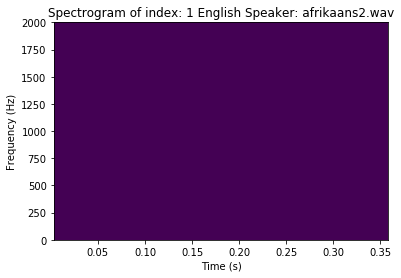

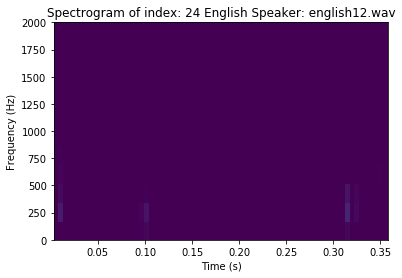

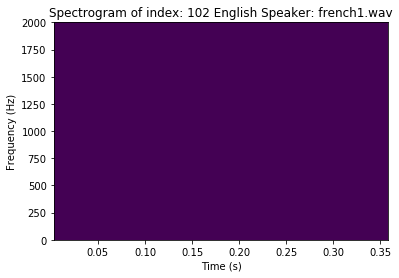

In [51]:
#Plot some spectrograms
list_indices = [1, 24, 102]
#list_indices = [24, 45, 96, 100, 102]
#list_indices = [114, 130, 145, 1, 2, 20, 21, 23]
for index in list_indices:
    plt.pcolormesh(list_of_dicts[index]['t'], list_of_dicts[index]['f'] , list_of_dicts[index]['spectrogram'])
    plt.title('Spectrogram of index: ' + str(index) + ' English Speaker: ' + str((list_of_dicts[index]['filename'])))
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.ylim(0, 2000)
    plt.show()
    
    #plt.plot(range(np.size(list_of_dicts[0]['fbank_feat'], 0)), list_of_dicts[0]['fbank_feat'])
    #plt.title('Filterbank: ' + str(index) + ' English Speaker: ' + str(list_of_dicts[index]['filename']))
    #plt.ylabel('Amplitude')
    #plt.xlabel('Frame number')
    #plt.show()

In [115]:
#Separate data for use
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
test_size = 0.15

#X_train, X_test, y_train, y_test = train_test_split(list_of_dicts, labels, test_size = test_size, random_state = 27)
#X_train, X_test, y_train, y_test = train_test_split(list_of_dicts, labels, test_size = test_size, random_state = 31)
X_train, X_test, y_train, y_test = train_test_split(list_of_dicts, labels, test_size = test_size)

bank_train = []
dtw_train = []
y_train = np.array(y_train)
y_test = np.array(y_test)

mfcc_train = []
mfcc_test = []

MAX_MFCC_FEAT = 32
#RNN Input needs to be the same

for index in range(len(X_train)):
    bank_data = X_train[index]['fbank_means']
    bank_std = X_train[index]['fbank_std']
    feat_data = [bank_data, bank_std]
    #feat_dtw = [X_train[index]['dtw_feat']]
    mfcc_feat = X_train[index]['mfcc_feat'][0:MAX_MFCC_FEAT]
    bank_train.append(feat_data)
    dtw_train.append(feat_dtw)
    mfcc_train.append(mfcc_feat)
    #stft_train.append(stft_data)
    
bank_test = []    
dtw_test = []
for index in range(len(X_test)):
    bank_data = X_test[index]['fbank_means']
    bank_std = X_train[index]['fbank_std']
    feat_data = [bank_data, bank_std]
    #feat_dtw = [X_train[index]['dtw_feat']]
    mfcc_feat = X_test[index]['mfcc_feat'][0:MAX_MFCC_FEAT]
    bank_test.append(feat_data)
    dtw_test.append(feat_dtw)
    mfcc_test.append(mfcc_feat)

#print(bank_test)
print(len(mfcc_train))
print('Separated Training / Test')   
print('num_objs T: ' + str(len(bank_train)) + 'obj_len T: ' + str(len(bank_train[0])))
print('y_train: ' + str(len(y_train)))
#print('num_objs F: ' + str(len(stft_test)) + 'obj_len F: ' + str(len(stft_test[0])))

144
Separated Training / Test
num_objs T: 144obj_len T: 2
y_train: 144


In [124]:
#Calculate an average of the data
from keras import optimizers
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, concatenate
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder
#Separate data for use
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
test_size = 0.15

history_list = []
for model_iter in range(5):
    #X_train, X_test, y_train, y_test = train_test_split(list_of_dicts, labels, test_size = test_size, random_state = 27)
    #X_train, X_test, y_train, y_test = train_test_split(list_of_dicts, labels, test_size = test_size, random_state = 31)
    X_train, X_test, y_train, y_test = train_test_split(list_of_dicts, labels, test_size = test_size)

    bank_train = []
    dtw_train = []
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    mfcc_train = []
    mfcc_test = []

    MAX_MFCC_FEAT = 32
    #RNN Input needs to be the same

    for index in range(len(X_train)):
        bank_data = X_train[index]['fbank_means']
        bank_std = X_train[index]['fbank_std']
        feat_data = [bank_data, bank_std]
        #feat_dtw = [X_train[index]['dtw_feat']]
        mfcc_feat = X_train[index]['mfcc_feat'][0:MAX_MFCC_FEAT]
        bank_train.append(feat_data)
        dtw_train.append(feat_dtw)
        mfcc_train.append(mfcc_feat)
        #stft_train.append(stft_data)

    bank_test = []    
    dtw_test = []
    for index in range(len(X_test)):
        bank_data = X_test[index]['fbank_means']
        bank_std = X_train[index]['fbank_std']
        feat_data = [bank_data, bank_std]
        #feat_dtw = [X_train[index]['dtw_feat']]
        mfcc_feat = X_test[index]['mfcc_feat'][0:MAX_MFCC_FEAT]
        bank_test.append(feat_data)
        dtw_test.append(feat_dtw)
        mfcc_test.append(mfcc_feat)

    #print(bank_test)
    print(len(mfcc_train))
    print('Separated Training / Test')   
    print('num_objs T: ' + str(len(bank_train)) + 'obj_len T: ' + str(len(bank_train[0])))
    print('y_train: ' + str(len(y_train)))
    #print('num_objs F: ' + str(len(stft_test)) + 'obj_len F: ' + str(len(stft_test[0])))

    #Apply a simple CNN to filterbanks
    #inputfilterbank = Input(shape=(26,))
    #Initialize network
    num_neurons = len(bank_train[0])*len(bank_train[0][0])
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(num_neurons, activation="sigmoid", input_shape = (len(bank_train), len(bank_train[0]))))
    model.add(Dense(26, activation="sigmoid"))
    model.add(Dense(13, activation="sigmoid"))
    model.add(Dense(2, activation="sigmoid"))

    #Construct Model
    Adam=optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    training_data = np.array(bank_train)
    test_data = np.array(bank_test)

    #Run model. Make sure to regen this model to prevent overfitting
    history=model.fit(training_data, y_train , validation_data=(test_data, y_test), epochs=130)
    history_list.append(history)

146
Separated Training / Test
num_objs T: 146obj_len T: 2
y_train: 146
Train on 146 samples, validate on 24 samples
Epoch 1/130
146/146 [==============================] - 0s 880us/step - loss: 0.6911 - accuracy: 0.5342 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/130
146/146 [==============================] - 0s 75us/step - loss: 0.6907 - accuracy: 0.5342 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/130
146/146 [==============================] - 0s 75us/step - loss: 0.6905 - accuracy: 0.5342 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 4/130
146/146 [==============================] - 0s 82us/step - loss: 0.6903 - accuracy: 0.5342 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 5/130
146/146 [==============================] - 0s 82us/step - loss: 0.6902 - accuracy: 0.5342 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 6/130
146/146 [==============================] - 0s 75us/step - loss: 0.6902 - accuracy: 0.5342 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 7/130
146/146

Epoch 57/130
146/146 [==============================] - 0s 75us/step - loss: 0.6656 - accuracy: 0.6096 - val_loss: 0.6740 - val_accuracy: 0.5417
Epoch 58/130
146/146 [==============================] - 0s 61us/step - loss: 0.6684 - accuracy: 0.5548 - val_loss: 0.6717 - val_accuracy: 0.6250
Epoch 59/130
146/146 [==============================] - 0s 61us/step - loss: 0.6635 - accuracy: 0.5822 - val_loss: 0.6654 - val_accuracy: 0.5000
Epoch 60/130
146/146 [==============================] - 0s 55us/step - loss: 0.6662 - accuracy: 0.6301 - val_loss: 0.6639 - val_accuracy: 0.5417
Epoch 61/130
146/146 [==============================] - 0s 61us/step - loss: 0.6575 - accuracy: 0.6438 - val_loss: 0.6702 - val_accuracy: 0.6250
Epoch 62/130
146/146 [==============================] - 0s 61us/step - loss: 0.6640 - accuracy: 0.5685 - val_loss: 0.6703 - val_accuracy: 0.6250
Epoch 63/130
146/146 [==============================] - 0s 62us/step - loss: 0.6596 - accuracy: 0.6027 - val_loss: 0.6618 - val_ac

146/146 [==============================] - 0s 61us/step - loss: 0.6005 - accuracy: 0.6507 - val_loss: 0.6216 - val_accuracy: 0.5417
Epoch 114/130
146/146 [==============================] - 0s 68us/step - loss: 0.6006 - accuracy: 0.6712 - val_loss: 0.6170 - val_accuracy: 0.6250
Epoch 115/130
146/146 [==============================] - 0s 61us/step - loss: 0.5985 - accuracy: 0.6644 - val_loss: 0.6179 - val_accuracy: 0.6250
Epoch 116/130
146/146 [==============================] - 0s 61us/step - loss: 0.6065 - accuracy: 0.6986 - val_loss: 0.6154 - val_accuracy: 0.6667
Epoch 117/130
146/146 [==============================] - 0s 61us/step - loss: 0.5982 - accuracy: 0.6712 - val_loss: 0.6290 - val_accuracy: 0.5000
Epoch 118/130
146/146 [==============================] - 0s 55us/step - loss: 0.5938 - accuracy: 0.6644 - val_loss: 0.6137 - val_accuracy: 0.7083
Epoch 119/130
146/146 [==============================] - ETA: 0s - loss: 0.5594 - accuracy: 0.75 - 0s 61us/step - loss: 0.6007 - accuracy:

146/146 [==============================] - 0s 68us/step - loss: 0.6915 - accuracy: 0.5068 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 39/130
146/146 [==============================] - 0s 68us/step - loss: 0.6914 - accuracy: 0.5068 - val_loss: 0.6874 - val_accuracy: 0.6667
Epoch 40/130
146/146 [==============================] - 0s 68us/step - loss: 0.6914 - accuracy: 0.5068 - val_loss: 0.6865 - val_accuracy: 0.6667
Epoch 41/130
146/146 [==============================] - 0s 61us/step - loss: 0.6912 - accuracy: 0.5068 - val_loss: 0.6871 - val_accuracy: 0.6667
Epoch 42/130
146/146 [==============================] - 0s 55us/step - loss: 0.6910 - accuracy: 0.5068 - val_loss: 0.6876 - val_accuracy: 0.6667
Epoch 43/130
146/146 [==============================] - 0s 70us/step - loss: 0.6909 - accuracy: 0.5068 - val_loss: 0.6877 - val_accuracy: 0.6667
Epoch 44/130
146/146 [==============================] - 0s 61us/step - loss: 0.6908 - accuracy: 0.5068 - val_loss: 0.6882 - val_accuracy: 0.666

146/146 [==============================] - 0s 68us/step - loss: 0.6454 - accuracy: 0.6644 - val_loss: 0.7169 - val_accuracy: 0.4167
Epoch 95/130
146/146 [==============================] - 0s 61us/step - loss: 0.6425 - accuracy: 0.6712 - val_loss: 0.7214 - val_accuracy: 0.4167
Epoch 96/130
146/146 [==============================] - 0s 62us/step - loss: 0.6410 - accuracy: 0.6712 - val_loss: 0.7149 - val_accuracy: 0.4583
Epoch 97/130
146/146 [==============================] - 0s 61us/step - loss: 0.6467 - accuracy: 0.6096 - val_loss: 0.6980 - val_accuracy: 0.5833
Epoch 98/130
146/146 [==============================] - 0s 55us/step - loss: 0.6437 - accuracy: 0.6575 - val_loss: 0.7402 - val_accuracy: 0.3333
Epoch 99/130
146/146 [==============================] - 0s 61us/step - loss: 0.6371 - accuracy: 0.6644 - val_loss: 0.7232 - val_accuracy: 0.4583
Epoch 100/130
146/146 [==============================] - 0s 61us/step - loss: 0.6393 - accuracy: 0.6438 - val_loss: 0.6969 - val_accuracy: 0.58

146/146 [==============================] - 0s 68us/step - loss: 0.6860 - accuracy: 0.5342 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 20/130
146/146 [==============================] - 0s 75us/step - loss: 0.6854 - accuracy: 0.5342 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 21/130
146/146 [==============================] - 0s 68us/step - loss: 0.6850 - accuracy: 0.5342 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 22/130
146/146 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.53 - 0s 68us/step - loss: 0.6859 - accuracy: 0.5342 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 23/130
146/146 [==============================] - 0s 68us/step - loss: 0.6843 - accuracy: 0.5342 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 24/130
146/146 [==============================] - 0s 68us/step - loss: 0.6834 - accuracy: 0.5342 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 25/130
146/146 [==============================] - 0s 68us/step - loss: 0.6827 - accuracy: 0.534

146/146 [==============================] - 0s 75us/step - loss: 0.6207 - accuracy: 0.6712 - val_loss: 0.6421 - val_accuracy: 0.6250
Epoch 76/130
146/146 [==============================] - 0s 68us/step - loss: 0.6193 - accuracy: 0.6644 - val_loss: 0.6376 - val_accuracy: 0.7083
Epoch 77/130
146/146 [==============================] - 0s 75us/step - loss: 0.6124 - accuracy: 0.6575 - val_loss: 0.6409 - val_accuracy: 0.6250
Epoch 78/130
146/146 [==============================] - 0s 75us/step - loss: 0.6197 - accuracy: 0.6438 - val_loss: 0.6396 - val_accuracy: 0.5833
Epoch 79/130
146/146 [==============================] - 0s 75us/step - loss: 0.6076 - accuracy: 0.6918 - val_loss: 0.6381 - val_accuracy: 0.7083
Epoch 80/130
146/146 [==============================] - 0s 75us/step - loss: 0.6143 - accuracy: 0.6438 - val_loss: 0.6354 - val_accuracy: 0.7500
Epoch 81/130
146/146 [==============================] - 0s 75us/step - loss: 0.6074 - accuracy: 0.6712 - val_loss: 0.6349 - val_accuracy: 0.666

Train on 146 samples, validate on 24 samples
Epoch 1/130
146/146 [==============================] - 0s 987us/step - loss: 0.7132 - accuracy: 0.5274 - val_loss: 0.6996 - val_accuracy: 0.5417
Epoch 2/130
146/146 [==============================] - 0s 75us/step - loss: 0.7009 - accuracy: 0.5274 - val_loss: 0.6938 - val_accuracy: 0.5417
Epoch 3/130
146/146 [==============================] - 0s 75us/step - loss: 0.6955 - accuracy: 0.5274 - val_loss: 0.6911 - val_accuracy: 0.5417
Epoch 4/130
146/146 [==============================] - 0s 68us/step - loss: 0.6924 - accuracy: 0.5274 - val_loss: 0.6902 - val_accuracy: 0.5417
Epoch 5/130
146/146 [==============================] - 0s 75us/step - loss: 0.6916 - accuracy: 0.5274 - val_loss: 0.6898 - val_accuracy: 0.5417
Epoch 6/130
146/146 [==============================] - 0s 75us/step - loss: 0.6910 - accuracy: 0.5274 - val_loss: 0.6897 - val_accuracy: 0.5417
Epoch 7/130
146/146 [==============================] - 0s 75us/step - loss: 0.6902 - accur

Epoch 57/130
146/146 [==============================] - 0s 55us/step - loss: 0.6501 - accuracy: 0.6438 - val_loss: 0.6588 - val_accuracy: 0.7083
Epoch 58/130
146/146 [==============================] - 0s 75us/step - loss: 0.6503 - accuracy: 0.6027 - val_loss: 0.6605 - val_accuracy: 0.7500
Epoch 59/130
146/146 [==============================] - 0s 75us/step - loss: 0.6507 - accuracy: 0.6370 - val_loss: 0.6750 - val_accuracy: 0.5833
Epoch 60/130
146/146 [==============================] - 0s 75us/step - loss: 0.6470 - accuracy: 0.6301 - val_loss: 0.6556 - val_accuracy: 0.7500
Epoch 61/130
146/146 [==============================] - 0s 68us/step - loss: 0.6437 - accuracy: 0.6164 - val_loss: 0.6524 - val_accuracy: 0.6667
Epoch 62/130
146/146 [==============================] - 0s 61us/step - loss: 0.6474 - accuracy: 0.6164 - val_loss: 0.6559 - val_accuracy: 0.7500
Epoch 63/130
146/146 [==============================] - 0s 61us/step - loss: 0.6414 - accuracy: 0.6575 - val_loss: 0.6555 - val_ac

Epoch 113/130
146/146 [==============================] - 0s 62us/step - loss: 0.5898 - accuracy: 0.6986 - val_loss: 0.6106 - val_accuracy: 0.6667
Epoch 114/130
146/146 [==============================] - 0s 61us/step - loss: 0.5896 - accuracy: 0.6986 - val_loss: 0.6122 - val_accuracy: 0.7083
Epoch 115/130
146/146 [==============================] - 0s 61us/step - loss: 0.5913 - accuracy: 0.6918 - val_loss: 0.6096 - val_accuracy: 0.6667
Epoch 116/130
146/146 [==============================] - 0s 55us/step - loss: 0.5858 - accuracy: 0.6918 - val_loss: 0.6246 - val_accuracy: 0.6667
Epoch 117/130
146/146 [==============================] - 0s 62us/step - loss: 0.5922 - accuracy: 0.6918 - val_loss: 0.6102 - val_accuracy: 0.7083
Epoch 118/130
146/146 [==============================] - 0s 61us/step - loss: 0.5888 - accuracy: 0.6781 - val_loss: 0.6066 - val_accuracy: 0.5833
Epoch 119/130
146/146 [==============================] - 0s 61us/step - loss: 0.5907 - accuracy: 0.6781 - val_loss: 0.6245 -

146/146 [==============================] - 0s 68us/step - loss: 0.6639 - accuracy: 0.6507 - val_loss: 0.6795 - val_accuracy: 0.5417
Epoch 39/130
146/146 [==============================] - 0s 61us/step - loss: 0.6648 - accuracy: 0.6438 - val_loss: 0.6773 - val_accuracy: 0.6250
Epoch 40/130
146/146 [==============================] - 0s 68us/step - loss: 0.6626 - accuracy: 0.6438 - val_loss: 0.6736 - val_accuracy: 0.5833
Epoch 41/130
146/146 [==============================] - 0s 68us/step - loss: 0.6614 - accuracy: 0.6301 - val_loss: 0.6681 - val_accuracy: 0.6667
Epoch 42/130
146/146 [==============================] - 0s 68us/step - loss: 0.6603 - accuracy: 0.6096 - val_loss: 0.6721 - val_accuracy: 0.5833
Epoch 43/130
146/146 [==============================] - 0s 61us/step - loss: 0.6581 - accuracy: 0.6164 - val_loss: 0.6879 - val_accuracy: 0.5833
Epoch 44/130
146/146 [==============================] - 0s 55us/step - loss: 0.6592 - accuracy: 0.6301 - val_loss: 0.6716 - val_accuracy: 0.583

146/146 [==============================] - 0s 68us/step - loss: 0.5911 - accuracy: 0.7055 - val_loss: 0.6898 - val_accuracy: 0.5833
Epoch 95/130
146/146 [==============================] - 0s 61us/step - loss: 0.6054 - accuracy: 0.6781 - val_loss: 0.6931 - val_accuracy: 0.6250
Epoch 96/130
146/146 [==============================] - 0s 61us/step - loss: 0.5893 - accuracy: 0.7055 - val_loss: 0.6860 - val_accuracy: 0.5417
Epoch 97/130
146/146 [==============================] - 0s 55us/step - loss: 0.6017 - accuracy: 0.6507 - val_loss: 0.6929 - val_accuracy: 0.5833
Epoch 98/130
146/146 [==============================] - 0s 61us/step - loss: 0.5896 - accuracy: 0.6781 - val_loss: 0.6895 - val_accuracy: 0.5833
Epoch 99/130
146/146 [==============================] - 0s 68us/step - loss: 0.5854 - accuracy: 0.6918 - val_loss: 0.6880 - val_accuracy: 0.5417
Epoch 100/130
146/146 [==============================] - 0s 55us/step - loss: 0.5874 - accuracy: 0.6849 - val_loss: 0.6918 - val_accuracy: 0.58

[0.49166667 0.49166667 0.49166667 0.49166667 0.49166667 0.49166667
 0.49166667 0.49166667 0.49166667 0.49166667 0.49166667 0.49166667
 0.49166667 0.49166667 0.49166667 0.49166667 0.55       0.55833334
 0.55833334 0.55833334 0.55833334 0.55833334 0.55833334 0.55833334
 0.55833334 0.48333334 0.50000001 0.55000001 0.56666667 0.55000001
 0.58333334 0.6        0.58333333 0.58333334 0.57500001 0.57500001
 0.60000001 0.59166667 0.63333334 0.64166667 0.65       0.63333334
 0.60833334 0.61666666 0.63333334 0.58333333 0.6        0.56666667
 0.575      0.58333334 0.59166666 0.59999999 0.6        0.61666667
 0.62500001 0.58333335 0.58333334 0.58333334 0.52499999 0.59166667
 0.56666668 0.59166666 0.56666667 0.57500001 0.59166667 0.575
 0.6        0.58333333 0.58333333 0.56666666 0.58333333 0.59166667
 0.56666667 0.54166666 0.56666667 0.56666667 0.58333333 0.56666666
 0.57499999 0.57499999 0.58333335 0.56666666 0.54166667 0.58333332
 0.59999999 0.57500001 0.59166666 0.58333334 0.60833332 0.57499999


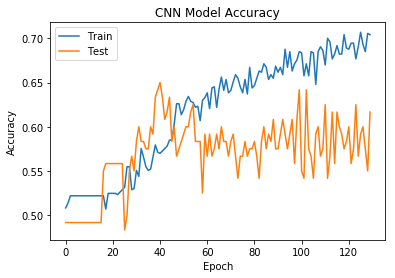

In [125]:
acc = []
val_acc = []
for history in history_list:
    acc.append(history.history['accuracy'])
    val_acc.append(history.history['val_accuracy'])
acc = np.array(acc)
val_acc = np.array(val_acc)
avg_acc = np.mean(acc, axis=0)
avg_val_acc = np.mean(val_acc, axis=0)
print(avg_val_acc)

plt.plot(avg_acc)
plt.plot(avg_val_acc)
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [109]:
from keras import optimizers
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, concatenate
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder

#Apply a simple CNN to filterbanks
#inputfilterbank = Input(shape=(26,))

#Time domain branch
#First layer should be 5000 neurons
num_neurons = len(bank_train[0])*len(bank_train[0][0])
#num_neurons = 1
#print(num_neurons)
model = Sequential()
model.add(Flatten())
model.add(Dense(num_neurons, activation="sigmoid", input_shape = (len(bank_train), len(bank_train[0]))))
model.add(Dense(26, activation="sigmoid"))
model.add(Dense(13, activation="sigmoid"))
model.add(Dense(2, activation="sigmoid"))

#model = Model(inputs = x, output = x_out)
print('Model Constructed')

Model Constructed


In [95]:
#Compile model and run
Adam=optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
#model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
training_data = np.array(bank_train)
test_data = np.array(bank_test)
#training_data = np.array(dtw_train)
#test_data = np.array(dtw_test)
print('Keras Model Starting...')
print(str(y_test) + str(len(y_test)))
print(str(y_train) + str(len(y_train)))

Keras Model Starting...
[0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1]26
[1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1]144


Train on 144 samples, validate on 26 samples
Epoch 1/130
144/144 [==============================] - 0s 893us/step - loss: 0.6947 - accuracy: 0.4931 - val_loss: 0.6853 - val_accuracy: 0.7308
Epoch 2/130
144/144 [==============================] - 0s 69us/step - loss: 0.6926 - accuracy: 0.5139 - val_loss: 0.6942 - val_accuracy: 0.4231
Epoch 3/130
144/144 [==============================] - 0s 83us/step - loss: 0.6936 - accuracy: 0.5069 - val_loss: 0.7072 - val_accuracy: 0.2692
Epoch 4/130
144/144 [==============================] - 0s 69us/step - loss: 0.6923 - accuracy: 0.5069 - val_loss: 0.7071 - val_accuracy: 0.2692
Epoch 5/130
144/144 [==============================] - 0s 76us/step - loss: 0.6918 - accuracy: 0.5069 - val_loss: 0.7013 - val_accuracy: 0.2692
Epoch 6/130
144/144 [==============================] - 0s 76us/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.4231
Epoch 7/130
144/144 [==============================] - 0s 83us/step - loss: 0.6913 - accur

144/144 [==============================] - 0s 83us/step - loss: 0.6643 - accuracy: 0.5972 - val_loss: 0.6695 - val_accuracy: 0.5000
Epoch 58/130
144/144 [==============================] - 0s 76us/step - loss: 0.6647 - accuracy: 0.6111 - val_loss: 0.6596 - val_accuracy: 0.5769
Epoch 59/130
144/144 [==============================] - 0s 83us/step - loss: 0.6628 - accuracy: 0.6181 - val_loss: 0.6193 - val_accuracy: 0.6923
Epoch 60/130
144/144 [==============================] - 0s 76us/step - loss: 0.6638 - accuracy: 0.6250 - val_loss: 0.6394 - val_accuracy: 0.6923
Epoch 61/130
144/144 [==============================] - 0s 69us/step - loss: 0.6627 - accuracy: 0.5972 - val_loss: 0.6437 - val_accuracy: 0.6538
Epoch 62/130
144/144 [==============================] - 0s 83us/step - loss: 0.6636 - accuracy: 0.6042 - val_loss: 0.6743 - val_accuracy: 0.5385
Epoch 63/130
144/144 [==============================] - 0s 83us/step - loss: 0.6603 - accuracy: 0.6181 - val_loss: 0.6376 - val_accuracy: 0.692

144/144 [==============================] - 0s 83us/step - loss: 0.6140 - accuracy: 0.6806 - val_loss: 0.5198 - val_accuracy: 0.6923
Epoch 114/130
144/144 [==============================] - 0s 76us/step - loss: 0.6227 - accuracy: 0.6667 - val_loss: 0.5822 - val_accuracy: 0.6923
Epoch 115/130
144/144 [==============================] - 0s 76us/step - loss: 0.6029 - accuracy: 0.7014 - val_loss: 0.5132 - val_accuracy: 0.6923
Epoch 116/130
144/144 [==============================] - 0s 83us/step - loss: 0.6151 - accuracy: 0.6736 - val_loss: 0.5720 - val_accuracy: 0.6923
Epoch 117/130
144/144 [==============================] - 0s 90us/step - loss: 0.6011 - accuracy: 0.6806 - val_loss: 0.5244 - val_accuracy: 0.7308
Epoch 118/130
144/144 [==============================] - 0s 76us/step - loss: 0.6099 - accuracy: 0.7014 - val_loss: 0.5303 - val_accuracy: 0.7308
Epoch 119/130
144/144 [==============================] - 0s 69us/step - loss: 0.5995 - accuracy: 0.6875 - val_loss: 0.5818 - val_accuracy:

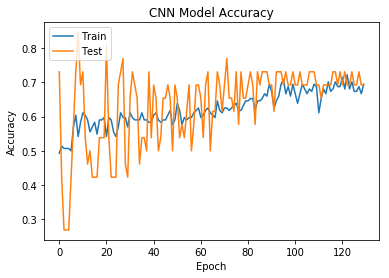

In [96]:
#Run model. Make sure to regen this model to prevent overfitting
history=model.fit(training_data, y_train , validation_data=(test_data, y_test), epochs=130)
#RNN on MFCC raw data did pretty much nothing,v but CNN on statistics of raw data was able to classify (standard deviation and mean)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#Best epoch run so far:
#Epoch 500/500
#144/144 [==============================] - 0s 76us/step - loss: 0.5578 - accuracy: 0.7014 - val_loss: 0.5827 - val_accuracy: 0.6538
#
#Even better: 
#Epoch 130/130
#144/144 [==============================] - 0s 69us/step - loss: 0.5611 - accuracy: 0.7361 - val_loss: 0.5890 - val_accuracy: 0.6923

In [70]:
#Restructure Data for RNN Use
#training_data = np.dstack(mfcc_train)
#test_data = np.dstack(mfcc_test)
training_data = np.stack(mfcc_train, axis=0)
test_data = np.stack(mfcc_test, axis=0)
#print(len(mfcc_train))
#shapes = {arr.shape for arr in mfcc_train}
#print(shapes)

from keras.utils import to_categorical
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

print(training_data.shape)
print(test_data.shape)

(144, 32, 13)
(26, 32, 13)


In [81]:
#Construct RNN.

#Just MFCC's: Only 53% validation rate.
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import MaxPooling1D
from keras import regularizers
from keras import optimizers
from keras import initializers

n_samples = training_data.shape[0]  # number of data points
n_features = training_data.shape[2]  # dimension of feature vector for each sample
time_steps = training_data.shape[1] # how many samples across time were taken

model = Sequential()

model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_initializer='random_normal', input_shape=(time_steps,n_features )))

model.add(MaxPooling1D(pool_size=(2), strides=2, padding='valid', data_format=None))

model.add(LSTM(40, return_sequences=True))

model.add(LSTM(30, return_sequences=False))

model.add(Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0,l2=0.5)))

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
Adam=optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, decay=0.99, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

history=model.fit(training_data, y_binary_train, validation_data=(test_data, y_binary_test), batch_size=100, epochs=100)



Train on 144 samples, validate on 26 samples
Epoch 1/100
144/144 [==============================] - 1s 7ms/step - loss: 2.8011 - accuracy: 0.5278 - val_loss: 2.7142 - val_accuracy: 0.5385
Epoch 2/100
144/144 [==============================] - 0s 104us/step - loss: 2.7074 - accuracy: 0.5278 - val_loss: 2.6729 - val_accuracy: 0.5385
Epoch 3/100
144/144 [==============================] - 0s 118us/step - loss: 2.6693 - accuracy: 0.5278 - val_loss: 2.6473 - val_accuracy: 0.5385
Epoch 4/100
144/144 [==============================] - 0s 90us/step - loss: 2.6440 - accuracy: 0.5278 - val_loss: 2.6287 - val_accuracy: 0.5385
Epoch 5/100
144/144 [==============================] - 0s 104us/step - loss: 2.6270 - accuracy: 0.5278 - val_loss: 2.6140 - val_accuracy: 0.5385
Epoch 6/100
144/144 [==============================] - 0s 104us/step - loss: 2.6135 - accuracy: 0.5278 - val_loss: 2.6020 - val_accuracy: 0.5385
Epoch 7/100
144/144 [==============================] - 0s 97us/step - loss: 2.6003 - acc

Epoch 57/100
144/144 [==============================] - 0s 97us/step - loss: 2.4572 - accuracy: 0.5278 - val_loss: 2.4544 - val_accuracy: 0.5385
Epoch 58/100
144/144 [==============================] - 0s 111us/step - loss: 2.4550 - accuracy: 0.5278 - val_loss: 2.4533 - val_accuracy: 0.5385
Epoch 59/100
144/144 [==============================] - 0s 90us/step - loss: 2.4538 - accuracy: 0.5278 - val_loss: 2.4522 - val_accuracy: 0.5385
Epoch 60/100
144/144 [==============================] - 0s 83us/step - loss: 2.4531 - accuracy: 0.5278 - val_loss: 2.4511 - val_accuracy: 0.5385
Epoch 61/100
144/144 [==============================] - 0s 83us/step - loss: 2.4518 - accuracy: 0.5278 - val_loss: 2.4501 - val_accuracy: 0.5385
Epoch 62/100
144/144 [==============================] - 0s 97us/step - loss: 2.4506 - accuracy: 0.5278 - val_loss: 2.4490 - val_accuracy: 0.5385
Epoch 63/100
144/144 [==============================] - 0s 90us/step - loss: 2.4501 - accuracy: 0.5278 - val_loss: 2.4480 - val_a

In [ ]:
#RNN on MFCC raw data did pretty much nothing,v but CNN on statistics of raw data was able to classify (standard deviation and mean)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()